## Importing Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Set the style for plots
plt.style.use('ggplot')

## Data Loading

In [2]:
# Step 1: Loading the Customer NewCustomerList Data
trans = pd.read_excel('Raw_data.xlsx', sheet_name='Transactions')

In [3]:
# Display the first few rows of the dataset
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
# Step 2: Exploring the dataset information
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The datatype of the product_first_sold_date column is currently in float64 format. This column must be converted to datetime format for accurate date handling and analysis.

## Total Records

In [5]:
  # Step 3: Displaying total records and columns
print(f"Total records: {trans.shape[0]}")
print(f"Total columns: {trans.shape[1]}")

Total records: 20000
Total columns: 13


## Numeric Columns and Non-Numeric Columns

In [6]:
# Step 4: Identifying numeric and non-numeric columns
df_numeric = trans.select_dtypes(include=[np.number])
df_non_numeric = trans.select_dtypes(exclude=[np.number])
print(f"Numeric columns: {df_numeric.columns.values}")
print(f"Non-numeric columns: {df_non_numeric.columns.values}")

Numeric columns: ['transaction_id' 'product_id' 'customer_id' 'list_price' 'standard_cost'
 'product_first_sold_date']
Non-numeric columns: ['transaction_date' 'online_order' 'order_status' 'brand' 'product_line'
 'product_class' 'product_size']


## 2. Missing Values Check

We will check for the presence of any missing values in the dataset. If missing values are present for a particular feature, then depending on the situation, the feature may be either dropped (in cases where a significant amount of data is missing) or an appropriate value will be imputed in the feature column with missing values.

In [7]:
# Step 5: Checking for missing values
print("Missing values in each column:")
print(trans.isnull().sum())

Missing values in each column:
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


In [8]:
# Percentage of missing values
print("Percentage of missing values in each column:\n", trans.isnull().mean() * 100)

Percentage of missing values in each column:
 transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64


It has been observed that the following columns contain missing values: online_order, brand, product_line, product_class, product_size, standard_cost, and product_first_sold_date.

## 1.1 Online Order

Since 1.8 % of the records have online_order data missing we can perform mode imputation for this categorical column.

In [9]:
trans[trans['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [10]:
# Calculate the most frequent value in the 'online_order' column
most_freq_online_mode = trans['online_order'].mode()

# Print the most frequent value
print("Most frequent online order mode:", most_freq_online_mode[0])


Most frequent online order mode: True


Since 'True' is the most frequent value in the online_order column, we will perform mode imputation to replace the missing values in this categorical variable.

In [11]:
trans['online_order'].fillna('True', inplace=True)


C:\Users\thang\AppData\Local\Temp\ipykernel_7744\380264385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trans['online_order'].fillna('True', inplace=True)


In [12]:
trans['online_order'].isnull().sum()

np.int64(0)


Currently there are no missing values for online_order column

## 1.2 Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date

It is observed that when the 'brand' column is null, all other columns with missing values, such as 'product_line', 'product_class', 'product_size', 'standard_cost', and 'product_first_sold_date', are also null. Since these null values comprise only 1% of the dataset, we can drop these records/rows.

In [15]:
# Display unique rows where 'brand' is null for the specified columns
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].drop_duplicates()


,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [16]:
# Get the indices of rows to drop where 'brand' is null
records_to_drop = trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                                  'standard_cost', 'product_first_sold_date']].index

# Display the indices of the records to drop
records_to_drop


Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [17]:
# Drop the rows with the specified indices in place
trans.drop(index=records_to_drop, axis=0, inplace=True)


Finally, there are no missing values in the transaction dataset.

In [18]:
# Check for missing values in each column of the DataFrame
trans.isnull().sum()


transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [19]:
print("Total records after removing Missing Values: {}".format(trans.shape[0]))

Total records after removing Missing Values: 19803


## Creating a new feature called 'Profit': The 'Profit' column will represent the difference between the list price and the standard cost of a product.

In [21]:
# Create a new feature 'Profit' as the difference between 'list_price' and 'standard_cost'
trans['Profit'] = trans['list_price'] - trans['standard_cost']


<Axes: xlabel='Profit', ylabel='Count'>

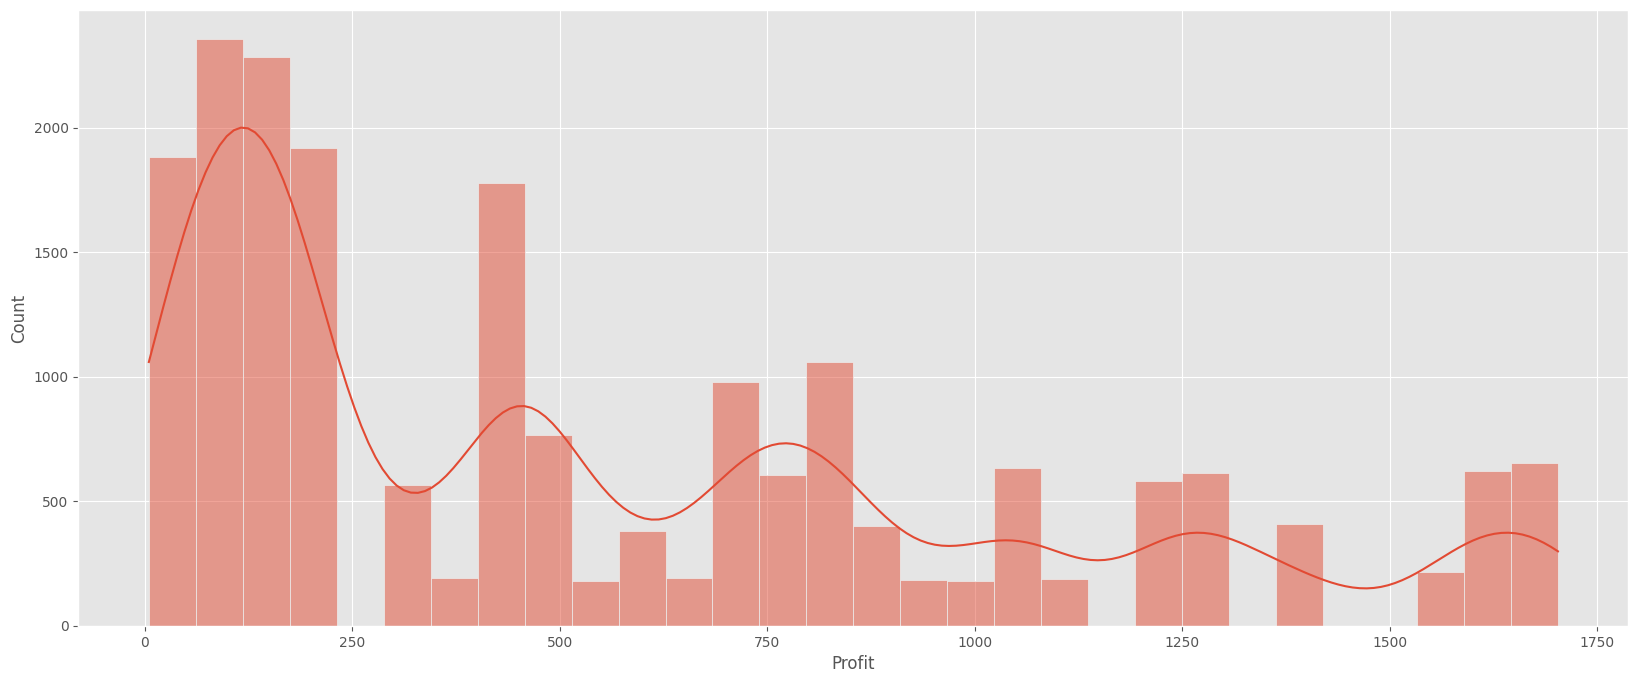

In [22]:
## Dystribution of the Profit Column
# Set the figure size
plt.figure(figsize=(20, 8))

# Plot the distribution of the 'Profit' column as a histogram
sns.histplot(trans['Profit'], bins=30, kde=True)

## 3. Inconsistency Check in Data

 We will check for inconsistent data or typographical errors present in the categorical columns. The columns to be checked are 'online_order', 'order_status', 'product_line', 'product_class', and 'brand.

## 3.1 Online Order

 There is no inconsistent data in the 'online_order' column.

In [23]:
# Count the unique values in the 'online_order' column
trans['online_order'].value_counts()

online_order
True     9738
False    9706
True      358
q           1
Name: count, dtype: int64

## 3.2 Order Status

There is no inconsistent data in the 'Order Status' column.

In [25]:
# Count the unique values in the 'order_status' column
trans['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [26]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,False
1,Approved,True
5,Approved,q
42,Cancelled,False
97,Approved,True
254,Cancelled,True
2632,Cancelled,True


## 3.3 Product Line
There is no inconsistent data in product_line column.

In [27]:
trans['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

## 3.4 Product Class
There is no inconsistent data in product_class column.

In [28]:
trans['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

## 3.5 Product Size
There is no inconsistent data in product_size column.

In [29]:
trans['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

## 3.6 Brand
There is no inconsistent data in brand column.

In [30]:
trans['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

## 4. Duplication Checks
We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [31]:
# Remove the 'transaction_id' column and drop duplicates
trans_dedupped = trans.drop('transaction_id', axis=1).drop_duplicates()

# Print the number of records after removing 'transaction_id' and duplicates
print("Number of records after removing 'transaction_id' and duplicates: {}".format(trans_dedupped.shape[0]))

# Print the number of records in the original dataset
print("Number of records in the original dataset: {}".format(trans.shape[0]))


Number of records after removing 'transaction_id' and duplicates: 19803
Number of records in the original dataset: 19803


Since both the numbers are same. There are no duplicate records in the dataset

## 5. Exporting the Cleaned Transactions Dataset to CSV

 The transactions dataset is now clean. Therefore, we can export the data to a CSV file to continue our analysis of customer segments by joining it with other tables.

In [32]:
# Export the cleaned transactions DataFrame to a CSV file
trans.to_csv('Transactions_Cleaned.csv', index=False)
